In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pwd=os.getcwd()
filepath1=os.path.join(pwd,"titanic_dataset_final.csv")
filepath2=os.path.join(pwd,"titantic_test.csv")

In [2]:
train_df=pd.read_csv(filepath1)
test_df=pd.read_csv(filepath2)

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


thus age, cabin, and embarked have mising values

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.select_dtypes('object').head(20)

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
5,"Moran, Mr. James",male,330877,NaN,Q
6,"McCarthy, Mr. Timothy J",male,17463,E46,S
7,"Palsson, Master. Gosta Leonard",male,349909,NaN,S
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,347742,NaN,S
9,"Nasser, Mrs. Nicholas (Adele Achem)",female,237736,NaN,C


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

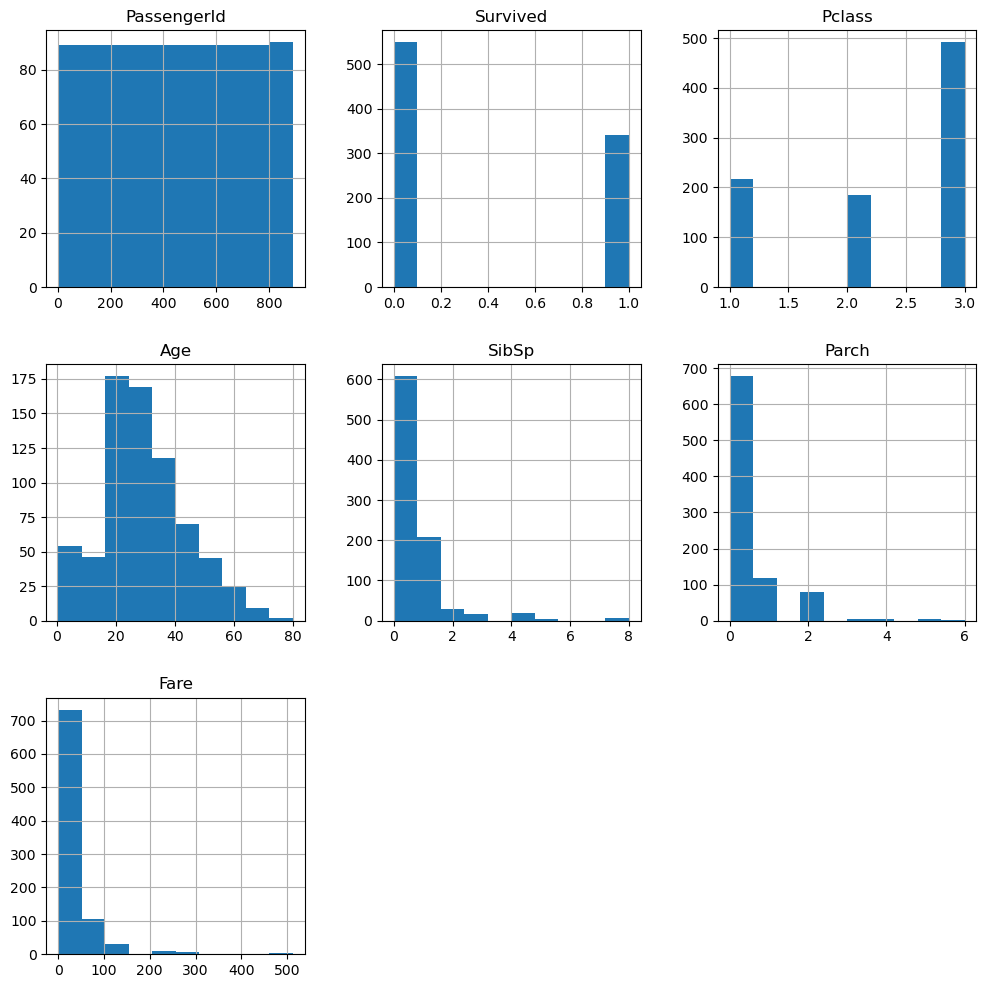

In [7]:
train_df.hist(figsize=(12,12))

as age has a skewed ditribution we will use median to impute the values 

<Axes: xlabel='Embarked', ylabel='count'>

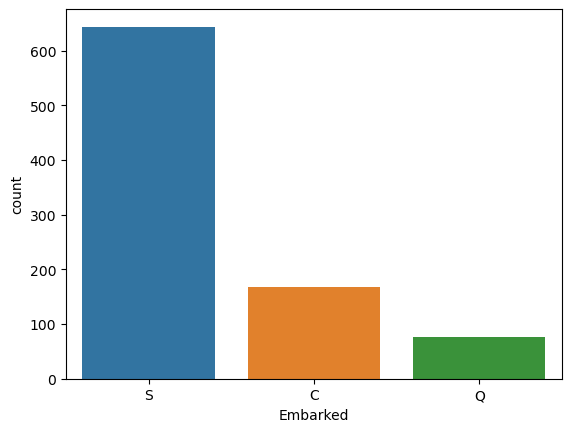

In [8]:
sns.countplot(train_df,x='Embarked')

now as most people went to S-SOUTHAMPTON thus it is a safe assumption to fill missing vales with S (mode of data)

In [9]:
total=train_df.isnull().sum().sort_values(ascending=False)

percentage=(train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)*100

missing_df=pd.DataFrame({'Total':total,"%":percentage})

missing_df

,Total,%
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


now as 70% of cabin data is missing there is no use of using that feature

In [10]:
train_df.drop('Cabin',axis=1,inplace=True)
test_df.drop('Cabin',axis=1,inplace=True)

now we already have split data and we can use cross-val thus we dont need a validation set

In [11]:
data_train=train_df.copy(deep=True)
data_test=test_df.copy(deep=True)

In [12]:
datasets=[data_train,data_test]

data cleaning

In [13]:

for data in datasets:



    data['Age'].fillna(data['Age'].median(),inplace=True)
    
    data['Embarked'].fillna(data['Embarked'].mode(),inplace=True)

    data['Fare'].fillna(data['Fare'].median(),inplace=True)


    

C:\Users\Shree\AppData\Local\Temp\ipykernel_3372\967689545.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(),inplace=True)
C:\Users\Shree\AppData\Local\Temp\ipykernel_3372\967689545.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [14]:
data_train['Age'].isnull().sum()

0

In [15]:
data_train.drop('PassengerId',axis=1,inplace=True)

In [16]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


data analysis

analysis of survived (target)

In [17]:
data_train['Survived'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [18]:
data_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

so more people died 

1.analysis on numeric data

In [19]:
data_train['Age'].median()

28.0

<Axes: >

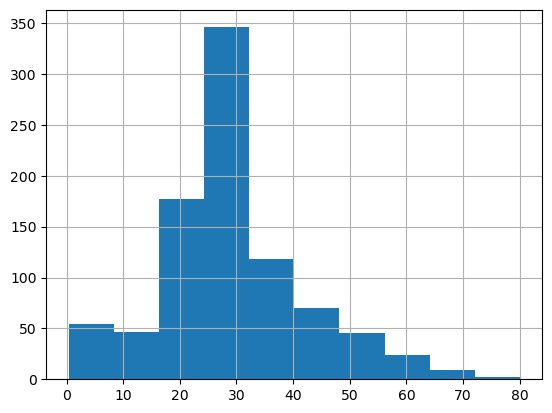

In [20]:
data_train['Age'].hist()

range=0-80

c:\Users\Shree\miniconda3\envs\hands_on_ml\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Shree\miniconda3\envs\hands_on_ml\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Age', ylabel='count'>

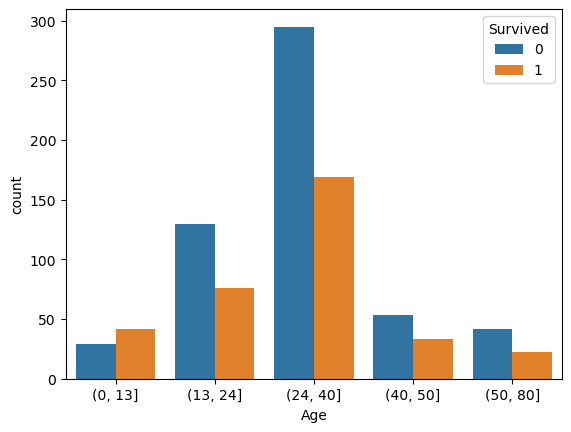

In [21]:
ages=pd.cut(data_train['Age'],bins = [0, 13,24,40,50,80])
hue_survive=data_train['Survived'].astype('str')
sns.countplot(x=ages,hue=hue_survive)

thus people in the age category of 24-40 have died the most 

In [22]:
data_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

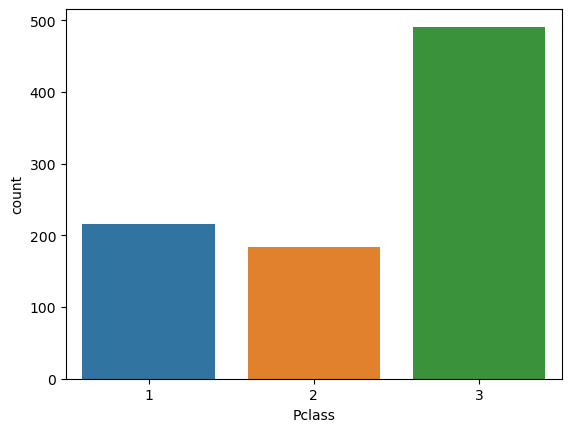

In [23]:
sns.countplot(data_train,x='Pclass')

thus most people sat in 3rd class

<Axes: xlabel='Pclass', ylabel='count'>

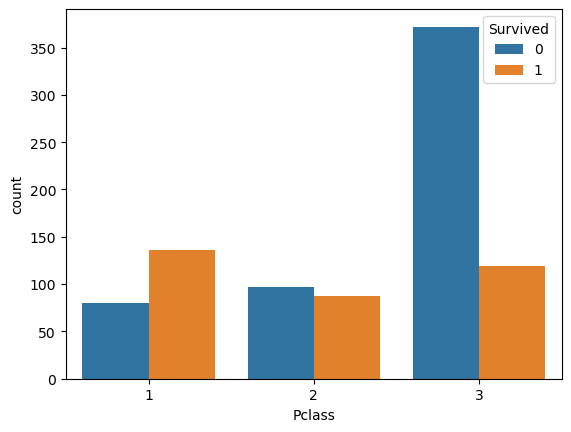

In [24]:

sns.countplot(data_train,x='Pclass',hue=hue_survive)

most people survived in 1st class

In [25]:
data_train['Fare'].median()

14.4542

In [26]:
px.histogram(data_train,x='Fare')

c:\Users\Shree\miniconda3\envs\hands_on_ml\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\Shree\miniconda3\envs\hands_on_ml\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Axes: xlabel='Fare', ylabel='count'>

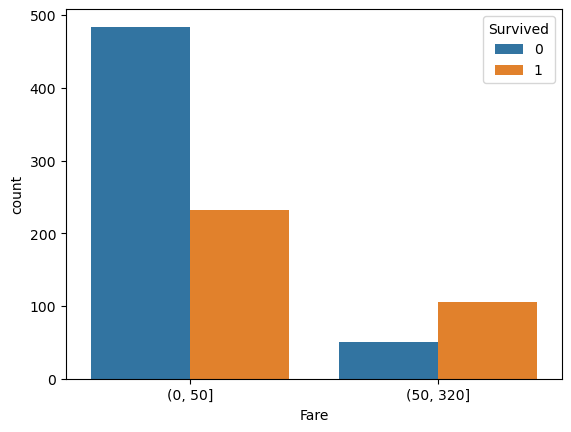

In [27]:
fares=pd.cut(data_train['Fare'],bins = [0,50,320])
hue_survive=data_train['Survived'].astype('str')
sns.countplot(x=fares,hue=hue_survive)

<Axes: >

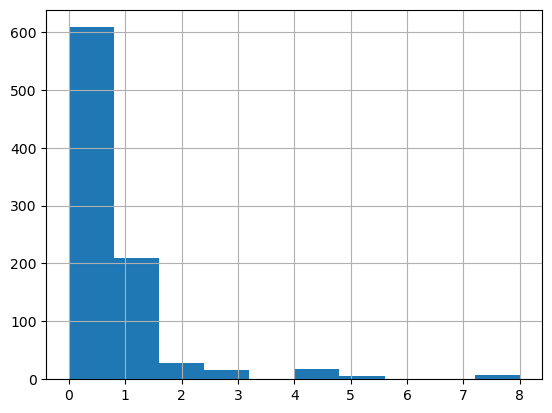

In [28]:
data_train['SibSp'].hist()

In [29]:
data_train['SibSp'].median()

0.0

In [30]:
data_train['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

thus most people dont have siblings

<Axes: xlabel='SibSp', ylabel='count'>

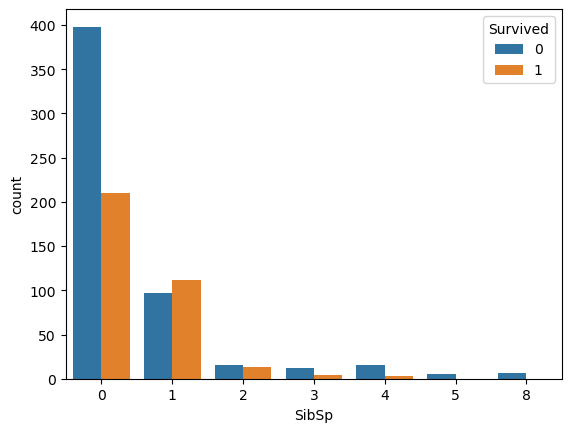

In [31]:
sns.countplot(data_train,x='SibSp',hue=hue_survive)

thus we can see as people have siblings have a greater chance of survival than those alone 

In [32]:
data_train['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: >

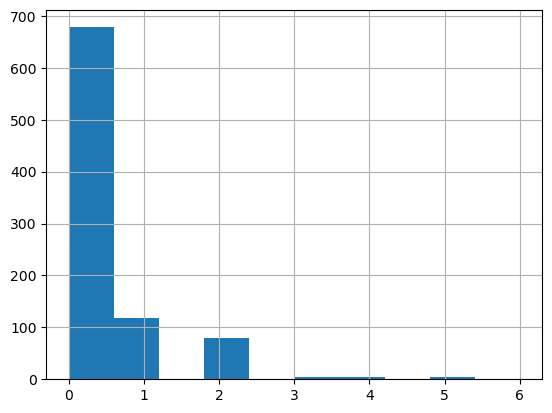

In [33]:
data_train['Parch'].hist()

thus most people dont have their kids or wives

<Axes: xlabel='Parch', ylabel='count'>

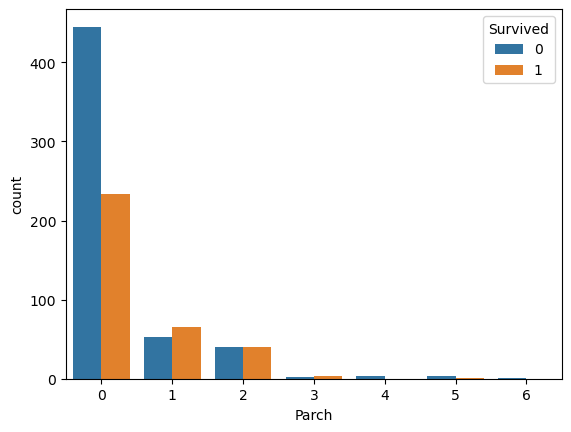

In [34]:
sns.countplot(data_train,x='Parch',hue=hue_survive)

thus we can see that those who are with their kids/wives have a greater chance of survival

thus we can make 2 new features - Family_size and isAlone

2. analysis of categorical values

In [35]:
data_train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

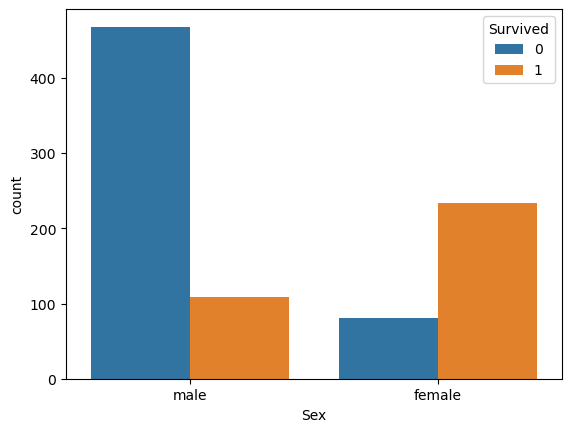

In [36]:
sns.countplot(data_train,x='Sex',hue=hue_survive)

thus more women survive (there may bee some correlation betwwen sex and family size)

In [37]:
data_train['Name'].head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

feature enginerring 

In [38]:
for data in datasets:
    data['Family_Size']=data['Parch']+data_train['SibSp']
    data['isAlone']=1
    data['isAlone'].loc[data['Family_Size']>0]=0
    

C:\Users\Shree\AppData\Local\Temp\ipykernel_3372\373719070.py:4: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\Shree\AppData\Local\Temp\ipykernel_3372\373719070.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy o

In [39]:
data_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,isAlone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,3,0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,1


In [40]:
for data in datasets:
    data['Title']=data['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    data['TicketPre']=data.Ticket.apply(lambda x: x.split(' ')[0] if x.isdigit()==False else 'NoPre')


In [41]:
data_train['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [42]:
data['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

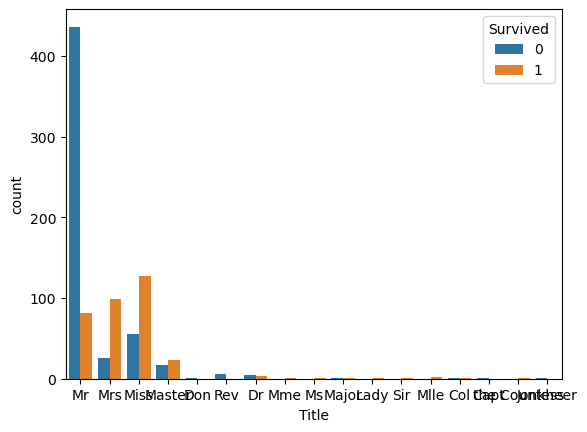

In [43]:
sns.countplot(data_train,x='Title',hue=hue_survive)

In [44]:
for data in datasets:
    data['Title']=data['Title'].replace('Dona','Mrs')
    data['Title']=data['Title'].replace("Mlle","Miss") #French  to En
    data['Title']=data['Title'].replace("Mme","Mrs")   #French  to En
    data['Title']=data['Title'].replace("Don","Sir")   #Spanish to En


In [45]:
data['Title'].value_counts(dropna=False)

Title
Mr        240
Miss       78
Mrs        73
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Name: count, dtype: int64

now col,master,ms,dr,rev are all miscellenous

In [46]:
misc=['Master','Col','Rev','Ms','Dr','Capt','Jonkheer', 'Lady', 'Major','the Countess']
for data in datasets:
    for title in misc:
        data['Title']=data['Title'].replace(title,'Misc')

In [47]:
data['Title'].value_counts()

Title
Mr      240
Miss     78
Mrs      73
Misc     27
Name: count, dtype: int64

In [48]:
data_train['TicketPre'].value_counts()

TicketPre
NoPre         661
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
A/5.            7
SOTON/OQ        7
STON/O2.        6
CA              6
F.C.C.          5
C               5
SC/PARIS        5
S.O.C.          5
SC/Paris        4
LINE            4
A/4             3
PP              3
A/4.            3
S.O./P.P.       3
SC/AH           3
A.5.            2
A./5.           2
P/PP            2
WE/P            2
SOTON/O2        2
S.C./PARIS      2
S.W./PP         1
F.C.            1
A/S             1
SO/C            1
W/C             1
SC              1
SCO/W           1
SW/PP           1
Fa              1
S.O.P.          1
S.C./A.4.       1
A4.             1
S.P.            1
W.E.P.          1
C.A./SOTON      1
Name: count, dtype: int64

now ticket,ticketPre and name are prettyy usesless due to high level of cardinality

In [49]:
for data in datasets:
    data.drop('Ticket',axis=1,inplace=True)
    data.drop('TicketPre',axis=1,inplace=True)
    data.drop('Name',axis=1,inplace=True)


In [50]:
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,isAlone,Title
0,0,3,male,22.0,1,0,7.2500,S,1,0,Mr
1,1,1,female,38.0,1,0,71.2833,C,1,0,Mrs
2,1,3,female,26.0,0,0,7.9250,S,0,1,Miss
3,1,1,female,35.0,1,0,53.1000,S,1,0,Mrs
4,0,3,male,35.0,0,0,8.0500,S,0,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,0,1,Misc
887,1,1,female,19.0,0,0,30.0000,S,0,1,Miss
888,0,3,female,28.0,1,2,23.4500,S,3,0,Miss
889,1,1,male,26.0,0,0,30.0000,C,0,1,Mr


now bining data removes noise and thus improves predictabilty

In [51]:
px.histogram(data_train,x='Fare')

thus as data is pretty uneven thus we dont know the range of values for each bin thus we use a quantile cut

In [52]:
px.histogram(data_train,x='Age')

thus now as data is pretty even as sort of a normal distribution thus we can use pd.cut

In [53]:
for data in datasets:
    data['FareBin'] = pd.qcut(data['Fare'], 4)

    data['AgeBin'] = pd.cut(data['Age'], 5)



In [54]:
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,isAlone,Title,FareBin,AgeBin
0,0,3,male,22.0,1,0,7.2500,S,1,0,Mr,"(-0.001, 7.91]","(16.336, 32.252]"
1,1,1,female,38.0,1,0,71.2833,C,1,0,Mrs,"(31.0, 512.329]","(32.252, 48.168]"
2,1,3,female,26.0,0,0,7.9250,S,0,1,Miss,"(7.91, 14.454]","(16.336, 32.252]"
3,1,1,female,35.0,1,0,53.1000,S,1,0,Mrs,"(31.0, 512.329]","(32.252, 48.168]"
4,0,3,male,35.0,0,0,8.0500,S,0,1,Mr,"(7.91, 14.454]","(32.252, 48.168]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,0,1,Misc,"(7.91, 14.454]","(16.336, 32.252]"
887,1,1,female,19.0,0,0,30.0000,S,0,1,Miss,"(14.454, 31.0]","(16.336, 32.252]"
888,0,3,female,28.0,1,2,23.4500,S,3,0,Miss,"(14.454, 31.0]","(16.336, 32.252]"
889,1,1,male,26.0,0,0,30.0000,C,0,1,Mr,"(14.454, 31.0]","(16.336, 32.252]"


Note: 

by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. 

DATA encoding

In [55]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for data in datasets:    
    
    data['AgeBin_Code'] = label.fit_transform(data['AgeBin'])
    data['FareBin_Code'] = label.fit_transform(data['FareBin'])
   

In [56]:
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,isAlone,Title,FareBin,AgeBin,AgeBin_Code,FareBin_Code
0,0,3,male,22.0,1,0,7.2500,S,1,0,Mr,"(-0.001, 7.91]","(16.336, 32.252]",1,0
1,1,1,female,38.0,1,0,71.2833,C,1,0,Mrs,"(31.0, 512.329]","(32.252, 48.168]",2,3
2,1,3,female,26.0,0,0,7.9250,S,0,1,Miss,"(7.91, 14.454]","(16.336, 32.252]",1,1
3,1,1,female,35.0,1,0,53.1000,S,1,0,Mrs,"(31.0, 512.329]","(32.252, 48.168]",2,3
4,0,3,male,35.0,0,0,8.0500,S,0,1,Mr,"(7.91, 14.454]","(32.252, 48.168]",2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,0,1,Misc,"(7.91, 14.454]","(16.336, 32.252]",1,1
887,1,1,female,19.0,0,0,30.0000,S,0,1,Miss,"(14.454, 31.0]","(16.336, 32.252]",1,2
888,0,3,female,28.0,1,2,23.4500,S,3,0,Miss,"(14.454, 31.0]","(16.336, 32.252]",1,2
889,1,1,male,26.0,0,0,30.0000,C,0,1,Mr,"(14.454, 31.0]","(16.336, 32.252]",1,2


In [57]:
data_train['FareBin_Code'].value_counts()

FareBin_Code
1    224
0    223
3    222
2    222
Name: count, dtype: int64

In [58]:
from sklearn.preprocessing import OneHotEncoder
encoder= OneHotEncoder(sparse=False,handle_unknown='ignore')
for data in datasets:    
    encoder.fit(data[['Sex','Title','Embarked']])
    encoded_cols=encoder.get_feature_names_out(['Sex','Title','Embarked'])
    data[encoded_cols]=encoder.transform(data[['Sex','Title','Embarked']])

c:\Users\Shree\miniconda3\envs\hands_on_ml\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

c:\Users\Shree\miniconda3\envs\hands_on_ml\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [59]:
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,isAlone,...,Sex_male,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,Title_Sir,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0,3,male,22.0,1,0,7.2500,S,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,female,38.0,1,0,71.2833,C,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1,3,female,26.0,0,0,7.9250,S,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,female,35.0,1,0,53.1000,S,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,3,male,35.0,0,0,8.0500,S,0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,0,1,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
887,1,1,female,19.0,0,0,30.0000,S,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
888,0,3,female,28.0,1,2,23.4500,S,3,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
889,1,1,male,26.0,0,0,30.0000,C,0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [60]:
data_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Family_Size', 'isAlone', 'Title', 'FareBin', 'AgeBin',
       'AgeBin_Code', 'FareBin_Code', 'Sex_female', 'Sex_male', 'Title_Misc',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Sir', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Embarked_nan'],
      dtype='object')

In [61]:
data_train.drop('Embarked_nan',axis=1,inplace=True)

In [62]:
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,isAlone,...,Sex_female,Sex_male,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,Title_Sir,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,S,1,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,1,female,38.0,1,0,71.2833,C,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,3,female,26.0,0,0,7.9250,S,0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,female,35.0,1,0,53.1000,S,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,3,male,35.0,0,0,8.0500,S,0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,0,1,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,1,1,female,19.0,0,0,30.0000,S,0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0,3,female,28.0,1,2,23.4500,S,3,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
889,1,1,male,26.0,0,0,30.0000,C,0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [63]:
data_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,isAlone,...,FareBin_Code,Sex_female,Sex_male,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,Embarked_C,Embarked_Q,Embarked_S
0,892,3,male,34.5,0,0,7.8292,Q,1.0,0,...,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,893,3,female,47.0,1,0,7.0000,S,1.0,0,...,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,894,2,male,62.0,0,0,9.6875,Q,0.0,1,...,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,895,3,male,27.0,0,0,8.6625,S,1.0,0,...,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,896,3,female,22.0,1,1,12.2875,S,1.0,0,...,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0,8.0500,S,0.0,1,...,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
414,1306,1,female,39.0,0,0,108.9000,C,0.0,1,...,3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
415,1307,3,male,38.5,0,0,7.2500,S,0.0,1,...,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
416,1308,3,male,27.0,0,0,8.0500,S,1.0,0,...,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [64]:
data_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Family_Size', 'isAlone', 'Title', 'FareBin', 'AgeBin',
       'AgeBin_Code', 'FareBin_Code', 'Sex_female', 'Sex_male', 'Title_Misc',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Sir', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [65]:
data_test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Family_Size', 'isAlone', 'Title', 'FareBin', 'AgeBin',
       'AgeBin_Code', 'FareBin_Code', 'Sex_female', 'Sex_male', 'Title_Misc',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [66]:
data_test.drop('PassengerId',axis=1,inplace=True)

In [67]:
numeric_cols=data_test.select_dtypes('number').columns
numeric_cols

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'isAlone',
       'AgeBin_Code', 'FareBin_Code', 'Sex_female', 'Sex_male', 'Title_Misc',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [68]:
X_train=data_train[numeric_cols]
target=data_train['Survived']
X_test=data_test[numeric_cols]

X=[X_train,X_test]

In [69]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
for data in X:
    scaler.fit(data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
    data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare',]]=scaler.transform(data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])

C:\Users\Shree\AppData\Local\Temp\ipykernel_3372\3566691627.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Shree\AppData\Local\Temp\ipykernel_3372\3566691627.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [70]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Family_Size,isAlone,AgeBin_Code,FareBin_Code,Sex_female,Sex_male,Title_Misc,Title_Miss,Title_Mr,Title_Mrs,Embarked_C,Embarked_Q,Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,1,0,1,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1,0,2,3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,0,1,1,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1,0,2,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0,1,2,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.181487,-0.474545,-0.473674,-0.386671,0,1,1,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
887,-1.566107,-0.796286,-0.474545,-0.473674,-0.044381,0,1,1,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
888,0.827377,-0.104637,0.432793,2.008933,-0.176263,3,0,1,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
889,-1.566107,-0.258337,-0.474545,-0.473674,-0.044381,0,1,1,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [79]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,target)

LogisticRegression()

In [80]:
model.score(X_train,target)

0.8204264870931538

In [81]:
preds_train=model.predict(X_train)


In [82]:
from sklearn.model_selection import cross_val_score

cross_val_score(model,X_train,target).mean()

0.8136902893729208

In [87]:
from sklearn.metrics import accuracy_score

preds=model.predict(X_test)
t=target.sample(418)
accuracy_score(t,preds)

0.5574162679425837

In [88]:
base=np.zeros(418)
accuracy_score(base,preds)

0.6148325358851675

In [89]:
base_train=np.zeros(len(X_train))
accuracy_score(base_train,preds_train)

0.6273849607182941